**1. CARGA Y EXPLORACIÓN DE DATOS**

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo en Google Drive (ajusta la ruta según la ubicación del archivo en tu Drive)
file_path = '/content/drive/My Drive/analisis_ecommerce/Online Retail.xlsx'


Mounted at /content/drive


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Cargar el dataset
data = pd.read_excel(file_path)

In [ ]:
# 1. Explorar las primeras filas
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
# 2. Dimensiones del dataset
print("\nDimensiones del dataset (filas, columnas):")
print(data.shape)


Dimensiones del dataset (filas, columnas):
(541909, 8)


In [ ]:
# 3. Tipos de datos y valores nulos
print("\nInformación del dataset:")
print(data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [ ]:
# 4. Resumen estadístico de columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(data.describe())


Resumen estadístico de columnas numéricas:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [ ]:
# 5. Comprobar valores faltantes
print("\nConteo de valores faltantes por columna:")
print(data.isnull().sum())


Conteo de valores faltantes por columna:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# 6. Comprobar duplicados
print("\nNúmero de filas duplicadas:")
print(data.duplicated().sum())


Número de filas duplicadas:
5268


**2. LIMPIEZA DE DATOS**

1. Manejar Valores Faltantes
Eliminaremos registros con valores faltantes en columnas esenciales, como CustomerID y Description.

In [ ]:
# Eliminar registros sin CustomerID o Description
data_cleaned = data.dropna(subset=['CustomerID', 'Description'])

# Verificar que no queden valores faltantes en estas columnas
print("\nValores faltantes después de eliminar registros sin CustomerID o Description:")
print(data_cleaned.isnull().sum())


Valores faltantes después de eliminar registros sin CustomerID o Description:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


2. Corregir Inconsistencias en las Columnas
Aquí verificamos que los tipos de datos sean correctos. Por ejemplo, aseguramos que InvoiceDate sea de tipo datetime.

In [ ]:
# Asegurar que InvoiceDate es tipo datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Verificar tipos de datos
print("\nTipos de datos después de correcciones:")
print(data_cleaned.dtypes)


Tipos de datos después de correcciones:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


<ipython-input-11-ffc2bbc587f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


3. Remover Valores Anómalos
Eliminamos registros con:

Cantidades negativas en Quantity.
Precios menores o iguales a cero en UnitPrice.

In [ ]:
# Eliminar registros con cantidades negativas
data_cleaned = data_cleaned[data_cleaned['Quantity'] > 0]

# Eliminar registros con precios menores o iguales a cero
data_cleaned = data_cleaned[data_cleaned['UnitPrice'] > 0]

# Verificar que no queden valores anómalos
print("\nRegistros con valores negativos en Quantity o UnitPrice después de limpieza:")
print(data_cleaned[(data_cleaned['Quantity'] <= 0) | (data_cleaned['UnitPrice'] <= 0)])



Registros con valores negativos en Quantity o UnitPrice después de limpieza:
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


Validación Final
Revisamos las dimensiones del DataFrame limpio y que no haya duplicados.

In [ ]:
# Dimensiones después de la limpieza
print("\nDimensiones del dataset después de limpieza:")
print(data_cleaned.shape)

# Verificar y eliminar duplicados
duplicates = data_cleaned.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")

# Eliminar duplicados si existen
if duplicates > 0:
    data_cleaned = data_cleaned.drop_duplicates()
    print("Duplicados eliminados.")



Dimensiones del dataset después de limpieza:
(397884, 8)

Número de filas duplicadas: 5192
Duplicados eliminados.


**3. ANÁLISIS DESCRIPTIVO**

1. Calcular Métricas Clave

In [ ]:
# Calcular ingresos por transacción (Cantidad * Precio Unitario)
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

# 1. Ingreso total generado
total_income = data_cleaned['TotalPrice'].sum()
print(f"Ingreso total generado: {total_income:.2f}")

# 2. Número de clientes únicos
unique_customers = data_cleaned['CustomerID'].nunique()
print(f"Número de clientes únicos: {unique_customers}")

# 3. Top 10 productos más vendidos (por cantidad)
top_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 productos más vendidos (por cantidad):")
print(top_products)


Ingreso total generado: 8887208.89
Número de clientes únicos: 4338

Top 10 productos más vendidos (por cantidad):
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


2. Analizar Patrones Temporales

Ventas Totales por Mes
Convertiremos la columna InvoiceDate a un índice temporal para facilitar el análisis.

In [ ]:
# Extraer el mes y año de la columna InvoiceDate
data_cleaned['YearMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')

# Calcular ventas totales por mes
monthly_sales = data_cleaned.groupby('YearMonth')['TotalPrice'].sum()
print("\nVentas totales por mes:")
print(monthly_sales)



Ventas totales por mes:
YearMonth
2010-12     570422.730
2011-01     568101.310
2011-02     446084.920
2011-03     594081.760
2011-04     468374.331
2011-05     677355.150
2011-06     660046.050
2011-07     598962.901
2011-08     644051.040
2011-09     950690.202
2011-10    1035642.450
2011-11    1156205.610
2011-12     517190.440
Freq: M, Name: TotalPrice, dtype: float64


Ventas Totales por Día de la Semana
Agregaremos una columna para el día de la semana.

In [ ]:
# Extraer día de la semana
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.day_name()

# Calcular ventas totales por día de la semana
weekday_sales = data_cleaned.groupby('DayOfWeek')['TotalPrice'].sum().sort_values(ascending=False)
print("\nVentas totales por día de la semana:")
print(weekday_sales)



Ventas totales por día de la semana:
DayOfWeek
Thursday     1973015.730
Tuesday      1697733.801
Wednesday    1584283.830
Friday       1483080.811
Monday       1363604.401
Sunday        785490.321
Name: TotalPrice, dtype: float64


3. Determinar Países con Mayor Volumen de Ventas

In [ ]:
# Calcular ventas totales por país
country_sales = data_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print("\nPaíses con mayor volumen de ventas:")
print(country_sales.head(10))



Países con mayor volumen de ventas:
Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalPrice, dtype: float64


**4. CREACIÓN DE NUEVAS CARACTERÍSTICAS**

1. Crear Columnas Nuevas

Mes y Año de la Compra
Aunque ya tenemos las columnas Year y Month parcialmente implementadas, nos aseguraremos de que estén correctamente configuradas:

In [ ]:
# Crear columnas para Mes y Año si no existen
if 'Month' not in data_cleaned.columns or 'Year' not in data_cleaned.columns:
    data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
    data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year

# Verificar las nuevas columnas
print("\nVerificando columnas de Mes y Año:")
print(data_cleaned[['InvoiceDate', 'Month', 'Year']].head())



Verificando columnas de Mes y Año:
          InvoiceDate  Month  Year
0 2010-12-01 08:26:00     12  2010
1 2010-12-01 08:26:00     12  2010
2 2010-12-01 08:26:00     12  2010
3 2010-12-01 08:26:00     12  2010
4 2010-12-01 08:26:00     12  2010


2. Calcular Estadísticas por Cliente

Nos centraremos en estadísticas como gasto promedio y frecuencia de compra por cliente, dado que aún no hemos generado estas métricas de manera persistente.

Gasto Promedio por Cliente
Aquí agrupamos por cliente para obtener el gasto total y promedio:

In [ ]:
# Calcular gasto total y promedio por cliente
customer_stats = data_cleaned.groupby('CustomerID').agg(
    TotalSpent=('TotalPrice', 'sum'),
    AvgSpent=('TotalPrice', 'mean')
).reset_index()

# Mostrar estadísticas de gasto
print("\nEstadísticas de gasto por cliente (Gasto total y promedio):")
print(customer_stats.head())



Estadísticas de gasto por cliente (Gasto total y promedio):
   CustomerID  TotalSpent      AvgSpent
0     12346.0    77183.60  77183.600000
1     12347.0     4310.00     23.681319
2     12348.0     1797.24     57.975484
3     12349.0     1757.55     24.076027
4     12350.0      334.40     19.670588


Frecuencia de Compra
Agregamos la frecuencia de compra (número de facturas únicas por cliente)

In [ ]:
# Calcular frecuencia de compra
customer_stats['PurchaseFrequency'] = data_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().values

# Verificar estadísticas actualizadas
print("\nEstadísticas de gasto y frecuencia por cliente:")
print(customer_stats.head())



Estadísticas de gasto y frecuencia por cliente:
   CustomerID  TotalSpent      AvgSpent  PurchaseFrequency
0     12346.0    77183.60  77183.600000                  1
1     12347.0     4310.00     23.681319                  7
2     12348.0     1797.24     57.975484                  4
3     12349.0     1757.55     24.076027                  1
4     12350.0      334.40     19.670588                  1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**5. VISUALIZACIÓN**

1. Productos Más Vendidos (Gráfico de Barras)

<ipython-input-22-3c486400ca5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


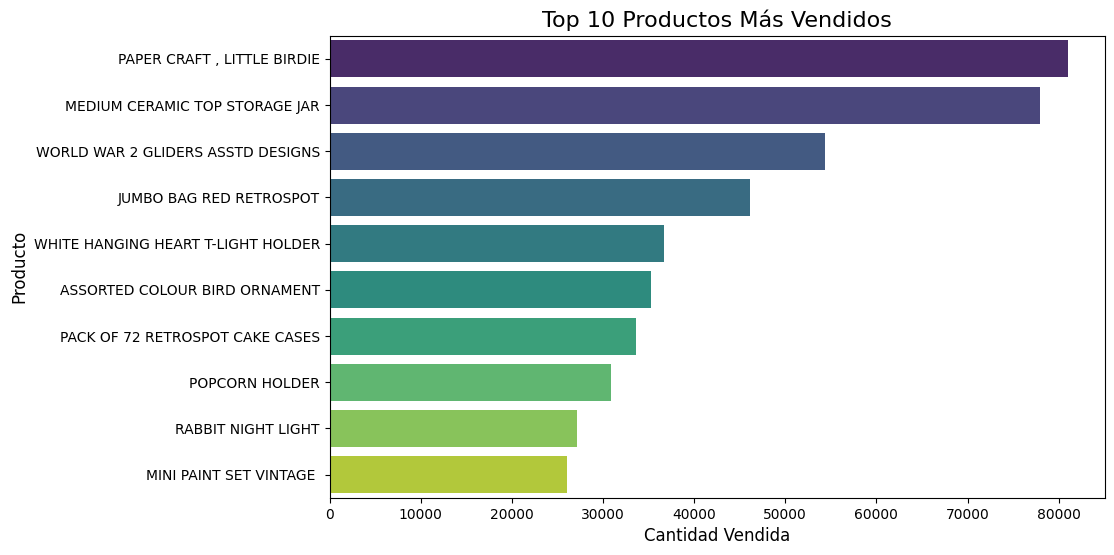

In [ ]:
# Top 10 productos más vendidos (por cantidad)
top_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Productos Más Vendidos", fontsize=16)
plt.xlabel("Cantidad Vendida", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.show()


2. Ingresos Mensuales (Gráfico de Línea)

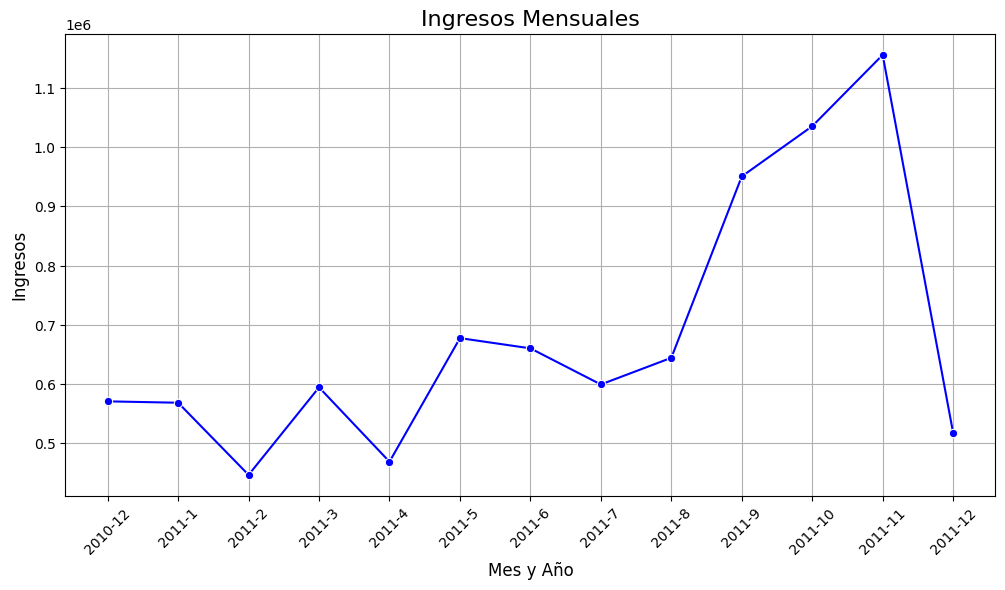

In [ ]:
# Ingresos por mes
monthly_sales = data_cleaned.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# Crear gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker="o", color="blue")
plt.title("Ingresos Mensuales", fontsize=16)
plt.xlabel("Mes y Año", fontsize=12)
plt.ylabel("Ingresos", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()


3. Distribución de Ingresos por Cliente (Histograma)

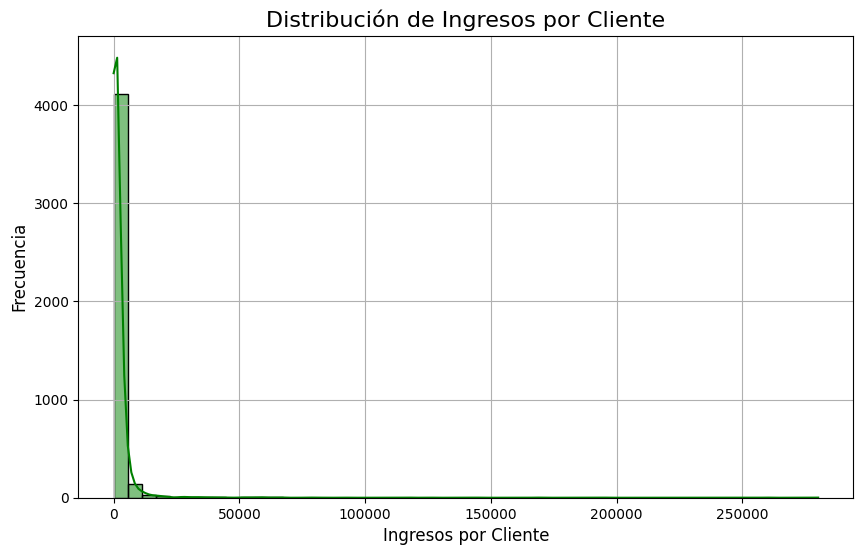

In [ ]:
# Distribución de ingresos por cliente
customer_sales = data_cleaned.groupby('CustomerID')['TotalPrice'].sum()

# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(customer_sales, bins=50, kde=True, color='green')
plt.title("Distribución de Ingresos por Cliente", fontsize=16)
plt.xlabel("Ingresos por Cliente", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid()
plt.show()

In [ ]:
!ls /content/drive/MyDrive/

 17144899276683239455027617036115.jpg
 4_6026078625139264929.pdf
 analisis_ecommerce
 base_de_datos.gsheet
 carta_de_renuncia_kg.gdoc
 cedula_diego_alejandro.pdf
 certificado_1017178915_5254196493641049515.pdf
 CertificadoDACQ.pdf
 Classroom
'Colab Notebooks'
'Copia de QA. Bug Report'$'\n''.xlsx'
'Copia de QA. Test Case'$'\n''.xlsx'
'CURSO ECXEL'
 diego_alejandro_correa_quiroz_titanic.gdoc
'DIEGO PC INFORMACION'
'Documentos declaracion renta 2022'
'Ensayo covid 19.gdoc'
 essay.gdoc
'Etiquetas HTML.gdoc'
 factura_11451903520221201.zip
 Fisica_Computacional-1_2021-I-main
'FORMATO INFORME NIVELACION EXTERNA (1).docx'
'Formulario sin título (File responses)'
 french_words.gsheet
 FRONT_END
 Gastos.gsheet
 Gastos_personales.gsheet
'Hoja de cálculo sin título (1).gsheet'
'Hoja de cálculo sin título (2).gsheet'
'Hoja de cálculo sin título.gsheet'
 inventario_la_bonanza.gsheet
'Libros Karate Do'
 Lista_equipos.gsheet
 LPIC-1
 mapa_usa.gslides
'marketing digital'
'Ofimática 1'
'Pregunta

In [ ]:
!ls /content/drive/MyDrive/analisis_ecommerce/

'Análisis de Datos de Ventas de un E-Commerce.ipynb'  'Online Retail.xlsx'


In [ ]:
/content/drive/MyDrive/Panalisis_ecommerce/Análisis_de_Datos_de_Ventas_de_un_E_Commerce.ipynb
